In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

new_data = pd.read_csv("modified_dataset.csv")

In [2]:
df = pd.DataFrame(new_data)
df = df[["fatalities", "landslide_size", "latitude", "longitude"]]

In [3]:
df = pd.get_dummies(df) # one-hot-encoding'landslide_size' (i.e. dummy_variable)

In [4]:
df.head()

,fatalities,latitude,longitude,landslide_size_Large,landslide_size_Medium,landslide_size_Small
0,10.0,33.7033,73.0380,0,1,0
1,0.0,49.0022,-122.7576,0,0,1
2,0.0,41.5490,-124.0611,0,0,1
3,13.0,30.6945,79.0544,1,0,0
4,0.0,34.2266,-118.0306,0,0,1


In [5]:
geolocation = df[["latitude", "longitude"]] # Making 2D-array for KMeans
geolocation.shape

(100, 2)

In [6]:
geolocation.head() 

,latitude,longitude
0,33.7033,73.0380
1,49.0022,-122.7576
2,41.5490,-124.0611
3,30.6945,79.0544
4,34.2266,-118.0306


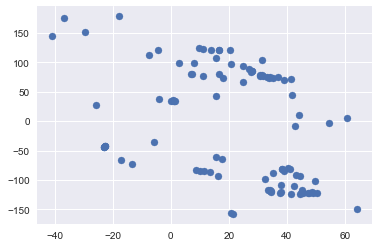

In [7]:
plt.scatter(geolocation["latitude"], geolocation["longitude"])

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5).fit(geolocation) # Categorizing the dataset into 5 clusters

In [9]:
cluster_array = kmeans.predict(geolocation) # predicting all the dataset's cluster numbers and make it into array
cluster_array

array([0, 1, 1, 0, 1, 1, 0, 0, 2, 4, 3, 1, 1, 0, 3, 2, 2, 3, 0, 0, 4, 1, 0,
       1, 0, 4, 0, 0, 3, 2, 3, 1, 1, 2, 0, 0, 0, 3, 3, 1, 1, 2, 1, 2, 2, 2,
       0, 0, 1, 3, 0, 1, 0, 1, 1, 1, 3, 0, 4, 0, 0, 3, 1, 0, 2, 4, 3, 1, 1,
       1, 1, 1, 1, 1, 4, 1, 0, 0, 0, 4, 4, 1, 1, 4, 1, 1, 4, 2, 4, 4, 0, 4,
       2, 0, 2, 1, 1, 3, 2, 1], dtype=int32)

In [10]:
df.insert(loc=6, column='cluster_number', value=cluster_array) # adding cluster_array to df as 'cluster_number'

In [11]:
df.head()

,fatalities,latitude,longitude,landslide_size_Large,landslide_size_Medium,landslide_size_Small,cluster_number
0,10.0,33.7033,73.0380,0,1,0,0
1,0.0,49.0022,-122.7576,0,0,1,1
2,0.0,41.5490,-124.0611,0,0,1,1
3,13.0,30.6945,79.0544,1,0,0,0
4,0.0,34.2266,-118.0306,0,0,1,1


In [12]:
groupby_cluster = df['fatalities'].groupby(df['cluster_number']) # grouping fatalities by cluster #
groupby_cluster

In [13]:
groupby_cluster.sum() # summing the number of fatalities by cluster number

cluster_number
0    106.0
1      6.0
2     15.0
3     10.0
4     42.0
Name: fatalities, dtype: float64

In [14]:
groupby_cluster.count() # looking at the distribution based on cluster number

cluster_number
0    27
1    34
2    14
3    12
4    13
Name: fatalities, dtype: int64

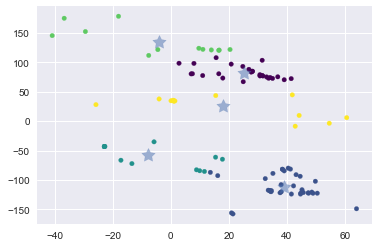

In [15]:
plt.scatter(df["latitude"], df["longitude"], s=20,c = cluster_array, cmap= 'viridis')

centers = kmeans.cluster_centers_
# latitude and longitude of cluster centers

plt.scatter(centers[:, 0], centers[:, 1], marker = (5,1), s=200 ,alpha=0.5)

In [25]:
kmeans.score(geolocation, cluster_array)

-55306.719200847729